In [462]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import ReLU, Input, LeakyReLU, Conv2D, Activation, MaxPool2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import Callback
from pathlib import Path
import os
import pathlib
import time
import datetime
from matplotlib import pyplot as plt
from IPython import display
import cv2
import numpy as np
from glob import glob 
from keras import backend as K
from contextlib import redirect_stdout
from keras.models import Model
from tensorflow.keras.applications import EfficientNetB0


PATH = 'G:/Deletar/pictures_conv'
tf.random.set_seed(42) 
PRECISION = tf.float32
HEIGHT = 128
WIDTH = 128
FILTERS = 128
KERNEL_SIZE = 3
STRIDES = 1
BATCH = 1
OUTPUT_CHANNELS = 3
BUFFER_SIZE = 1002


train_bw = glob("G:\\Deletar\\pictures_conv\\train_new\\bw\\*.jpg")
train_color = glob("G:\\Deletar\\pictures_conv\\train_new\\color\\*.jpg")
test_bw = glob("G:\\Deletar\\pictures_conv\\test_new\\bw\\*.jpg")
test_color = glob("G:\\Deletar\\pictures_conv\\test_new\\color\\*.jpg")

In [463]:
# apply black and white colors to image
def apply_bw(filename):
    img = plt.imread(filename)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Input IMG is RGB
    img = cv2.merge([img,img,img])
    return img

def resize_image2(data):
    resized_img = tf.image.resize(
    images=K,
    size=[HEIGHT, WIDTH],
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=True,
    )    
    return resized_img

def process_img(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, PRECISION)
    img = tf.image.resize(img, size=(HEIGHT, WIDTH))
    return img

# read img and transform into tensor image
def read_img(filename):
    img = plt.imread(filename)
    if len(img.shape) == 2:
        img = cv2.merge([img,img,img])
    img = tf.convert_to_tensor(img/255., dtype=PRECISION)
    return img

def get_all_info(folder):
    imgs = []
    for file in os.listdir(folder):
        img_tensor = read_img(folder + "\\" + file) 
    return imgs

""" z = get_all_info("G:\\Deletar\\pictures_conv\\train_new\\bw") """

files_ds = tf.data.Dataset.from_tensor_slices((train_bw, train_color))
files_ds = files_ds.map(lambda x, y: (process_img(x), process_img(y))).batch(BATCH).shuffle(BUFFER_SIZE)
val_files = tf.data.Dataset.from_tensor_slices((test_bw, test_color))
val_files = val_files.map(lambda x, y: (process_img(x), process_img(y))).batch(BATCH)

example = list(files_ds.as_numpy_iterator())
example2 = list(val_files.as_numpy_iterator())

In [464]:
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(Conv2D(filters, size, padding='same', strides=2, name='conv2d_01', kernel_initializer=initializer, use_bias=False,),)                           
    """ result.add(      
     Conv2D(tf.keras.layers.Conv2D(filters, kernel_size = size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))) """
    if apply_batchnorm:
      result.add(BatchNormalization())
    result.add(LeakyReLU())
    return result

def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = Sequential()
  result.add(
    Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))
  result.add(BatchNormalization())
  if apply_dropout:
      result.add(Dropout(0.5))
  result.add(ReLU())
  return result


class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, x_test):
        self.model = model

    def on_epoch_end(self, epoch, logs={}):
      if epoch % 5 == 0: 
        z = self.model.predict(example[0][0])
        plt.imshow(z[0])
        plt.show()
        

Epoch 1/200
496/496 [==============================] - 14s 25ms/step - loss: 0.0381 - accuracy: 0.4622 - val_loss: 0.0252 - val_accuracy: 0.3598


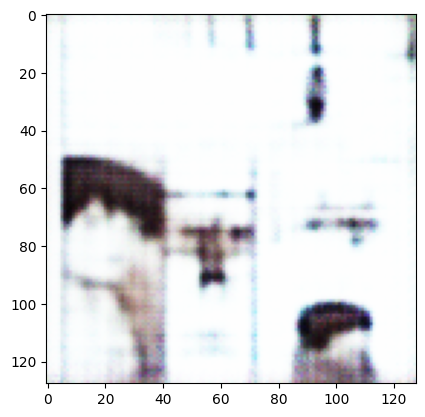

Epoch 2/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0206 - accuracy: 0.5045 - val_loss: 0.0145 - val_accuracy: 0.5907
Epoch 3/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0180 - accuracy: 0.5162 - val_loss: 0.0198 - val_accuracy: 0.3927
Epoch 4/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0167 - accuracy: 0.5282 - val_loss: 0.0133 - val_accuracy: 0.5586
Epoch 5/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0158 - accuracy: 0.5284 - val_loss: 0.0126 - val_accuracy: 0.4601
Epoch 6/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0150 - accuracy: 0.5333 - val_loss: 0.0116 - val_accuracy: 0.5360


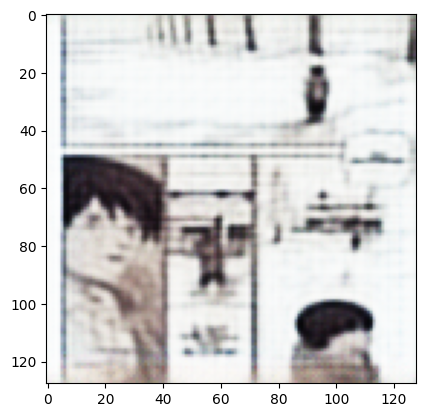

Epoch 7/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0144 - accuracy: 0.5330 - val_loss: 0.0140 - val_accuracy: 0.5765
Epoch 8/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0140 - accuracy: 0.5412 - val_loss: 0.0161 - val_accuracy: 0.3979
Epoch 9/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0138 - accuracy: 0.5385 - val_loss: 0.0145 - val_accuracy: 0.4786
Epoch 10/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0136 - accuracy: 0.5436 - val_loss: 0.0111 - val_accuracy: 0.5190
Epoch 11/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0131 - accuracy: 0.5478 - val_loss: 0.0122 - val_accuracy: 0.4354


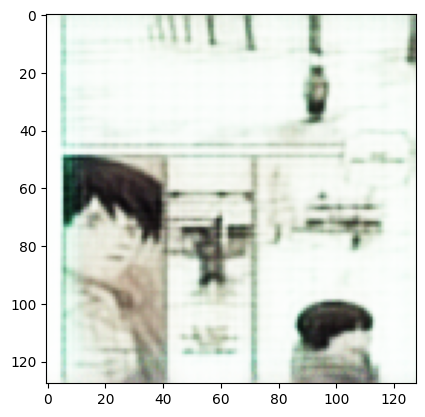

Epoch 12/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0129 - accuracy: 0.5406 - val_loss: 0.0104 - val_accuracy: 0.6155
Epoch 13/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0126 - accuracy: 0.5499 - val_loss: 0.0113 - val_accuracy: 0.5872
Epoch 14/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0122 - accuracy: 0.5554 - val_loss: 0.0103 - val_accuracy: 0.5473
Epoch 15/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0122 - accuracy: 0.5563 - val_loss: 0.0101 - val_accuracy: 0.6045
Epoch 16/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0118 - accuracy: 0.5547 - val_loss: 0.0103 - val_accuracy: 0.5964


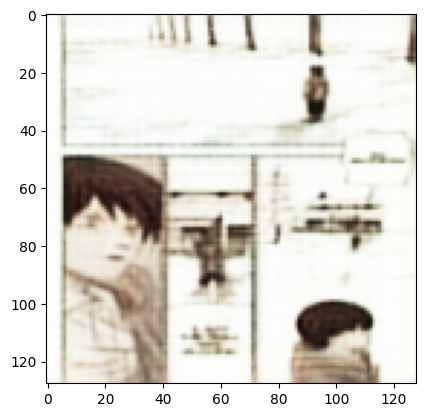

Epoch 17/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0119 - accuracy: 0.5537 - val_loss: 0.0098 - val_accuracy: 0.5437
Epoch 18/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0116 - accuracy: 0.5553 - val_loss: 0.0101 - val_accuracy: 0.5303
Epoch 19/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0115 - accuracy: 0.5549 - val_loss: 0.0100 - val_accuracy: 0.5528
Epoch 20/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0113 - accuracy: 0.5613 - val_loss: 0.0122 - val_accuracy: 0.5705
Epoch 21/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0112 - accuracy: 0.5566 - val_loss: 0.0095 - val_accuracy: 0.5769


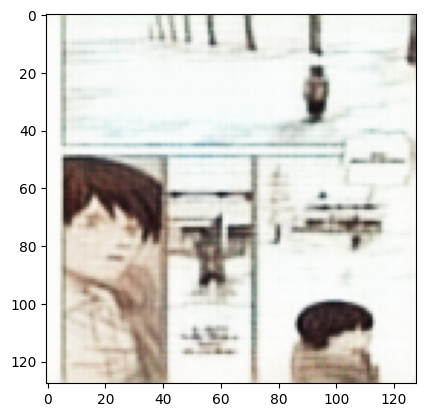

Epoch 22/200
496/496 [==============================] - 12s 25ms/step - loss: 0.0110 - accuracy: 0.5601 - val_loss: 0.0096 - val_accuracy: 0.5195


In [465]:
initializer = tf.random_normal_initializer(0., 0.02)

# improvements
# insert layer kernel_regularizer='l1'
# insert layer kernel_regularizer='l2'

model = Sequential()
model.add(Input(shape=(HEIGHT, WIDTH, 3,)))

#Encoder
""" model.add(downsample(64,4, apply_batchnorm=False))
model.add(downsample(128,4)) """


""" model.add(downsample(512,4, apply_batchnorm=False))
model.add(downsample(512,4))
model.add(downsample(512,4)) """
model.add(downsample(255,4, apply_batchnorm=False))
model.add(downsample(256,4))
model.add(downsample(256,4))







""" model.add(downsample(1024,4, apply_batchnorm=False)) #best """






#Decoder
""" model.add(upsample(512,4, apply_dropout=True))
model.add(upsample(512,4, apply_dropout=True)) """

model.add(upsample(256,4, apply_dropout=True))
model.add(upsample(256,4))





""" model.add(upsample(256,4, apply_dropout=True)) """
""" model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh'))  """

model.add(Conv2DTranspose(OUTPUT_CHANNELS, 16,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
""" model.add(Activation('tanh')) """
model.add(Activation('sigmoid'))





model.compile(
    # loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    # loss=tf.keras.losses.BinaryCrossentropy(),
    # loss=tf.keras.losses.MeanSquaredError(),
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer= tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    metrics=["accuracy"]    
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)



model.fit(files_ds,epochs=200, callbacks=[CustomCallback(model, files_ds), callback], validation_data=val_files)




 



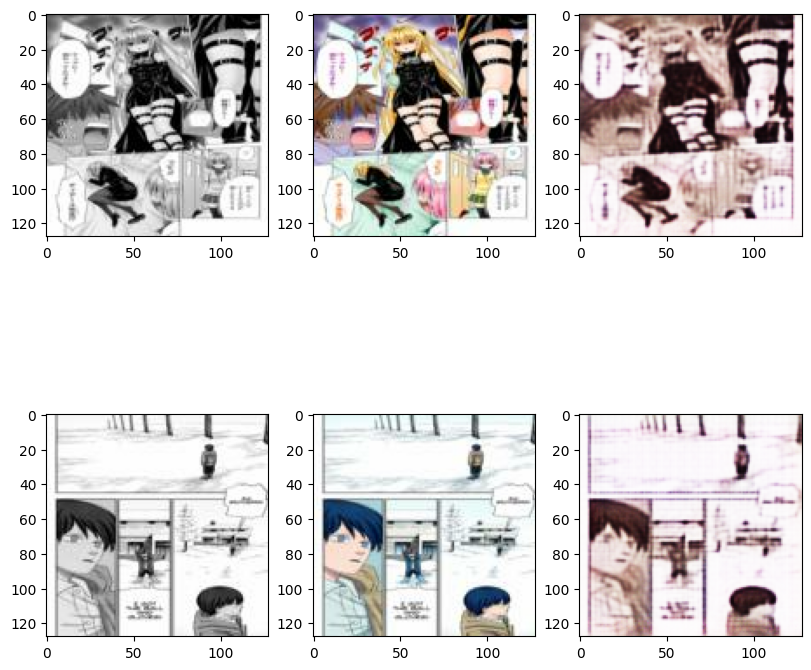

In [466]:
test_img_pred = model.predict(example2[0][0])[0]
train_img_pred = model.predict(example[0][0])[0]

f, axarr = plt.subplots(2,3, figsize=(8, 8), constrained_layout=True)
axarr[0,0].imshow(example2[0][0][0])
axarr[0,1].imshow(example2[0][1][0])
axarr[0,2].imshow(test_img_pred)
 
axarr[1,0].imshow(example[0][0][0])
axarr[1,1].imshow(example[0][1][0])
axarr[1,2].imshow(train_img_pred)

In [467]:
#comments

""" model = Sequential([
    Conv2D(FILTERS, (3, 3),  padding='same', name='conv2d_01'),
    LeakyReLU(),
    MaxPool2D((2, 2),  padding='same', name='max_pool_01'),
    Conv2D(FILTERS/2, (3, 3),  padding='same', name='conv2d_02'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPool2D((2, 2),  padding='same', name='max_pool_02'),
    Conv2D(FILTERS/4, (3, 3),  padding='same', name='conv2d_03'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPool2D((2, 2),  padding='same', name='max_pool_04'),
    Conv2D(FILTERS/4, (3, 3),  padding='same', name='conv2d_04'),
    Dropout(0.5),
    Activation('relu', name='relu_04'),
    UpSampling2D((2, 2)),
    Conv2D(FILTERS/2, (3, 3),  padding='same', name='conv2d_05'),
    Dropout(0.5),
    Activation('relu', name='relu_05'),
    UpSampling2D((2, 2)),
    Conv2D(FILTERS, (3, 3),  padding='same', name='conv2d_06'),
    Activation('relu', name='relu_06'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=1,
                                         padding='same'),
    Activation('tanh'),    
]) """

# model.add(Input(shape=[HEIGHT, WIDTH, 3]))

""" model.add(downsample(128,4, apply_batchnorm=False))
model.add(upsample(128,4, apply_dropout=True)) """

""" model = Sequential()
model.add(downsample(64,9, apply_batchnorm=False))
model.add(downsample(128,4))
model.add(upsample(128,4, apply_dropout=True))
model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh')) """

""" model.add(downsample(128,4)) """
""" model.add(downsample(256,4)) """
""" model.add(downsample(128,4, apply_batchnorm=False))
model.add(downsample(128,4))
model.add(downsample(128,4)) """
""" model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2))) """

""" model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh')) """


""" model.add(upsample(128,4, apply_dropout=True))
model.add(upsample(128,4, apply_dropout=True)) """
""" model.add(upsample(128,4))
model.add(upsample(128,4)) """
""" model.add(upsample(256,4, apply_dropout=True)) """
""" model.add(upsample(128,4)) """


""" 
model.add(UpSampling2D((2, 2))) """

""" encoder_output = (encoder_input)



decoder_output = (encoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output) """


' encoder_output = (encoder_input)\n\n\n\ndecoder_output = (encoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output) '